**Summary:** 

How does childhood household income affect factors in adult life like education, arrests, and marital status? Variables from the General Social Survey representing the chosen life factors are analyzed by creating visualizations of data for each variable compared to income. The methods used to collect and represent the data were grouped barplots and piecharts. It was found that there was a significant positive correlation between childhood income and the respondent’s highest education level. Additionally, among each income level, the lowest and highest categories of income were associated with higher numbers of arrests. Childhood income did not seem to have any correlation with divorce rates in adult life. Overall, childhood income levels compared to the highest education level obtained aligned with our predictions before running the data. However, when comparing the income levels to the arrest and divorce variables, our data suggests that growing up in a middle income level household yields the lowest probability of being arrested and divorced. Further data would have to be collected and analyzed before the results can be validated with confidence, however it is a good starting place for future research questions specifically regarding the effects of childhood income levels to the probabilities of getting arrested or divorced. Additionally, future research studies could see whether or not there is an underlying relationship between being the arrested and divorced variables themselves.


In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('gss_filtered.csv')

C:\Users\cynth\AppData\Local\Temp\ipykernel_20612\2936053992.py:4: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('gss_filtered.csv')


**Dataset and research question**

The dataset used for this project is the General Social Survey, a survey that has been conducted annually since 1972. The motivation behind this survey is to examine Americans’ social and economic views, and how they have changed over time. An important question that could be derived from this dataset is, “How does household income when you were growing up affect your adult life?” We use the variable ‘incom16’ as the foundation to our question, along with 3 variables to represent factors of “adult life,” like education, arrests, and marital status.

In [ ]:
df.shape

(72390, 8)

In [ ]:
df.head()

,Unnamed: 0,divorce,incom16,arrest,rincome,educ,ticket,marital
0,0,NaN,average,NaN,NaN,16.0,NaN,never married
1,1,no,above average,NaN,NaN,10.0,NaN,married
2,2,no,average,NaN,NaN,12.0,NaN,married
3,3,no,average,NaN,NaN,17.0,NaN,married
4,4,no,below average,NaN,NaN,12.0,NaN,married


In [ ]:
# Cleaned arrest

df['arrest'].unique()
df = df[df['arrest'].notna()].replace('no',0).replace('yes',1).replace('refused_(3)',np.nan)
df = df[df['arrest'].notna()]
df['arrest'].unique()

array([0., 1.])

In [ ]:
df['rincome'].unique()

array([nan, '$1,000 to $2,999', '$15,000 to $19,999', '$7,000 to $7,999',
       '$8,000 to $9,999', '$20,000 to $24,999', '$4,000 to $4,999',
       '$10,000 to $14,999', '$25,000 or more', '$3,000 to $3,999',
       'under $1,000', '$5,000 to $5,999', '$6,000 to $6,999'],
      dtype=object)

In [ ]:
# Cleaned data of rincome

df = df[df['rincome'].notna()].replace('$1,000 to $2,999', 1).replace('$15,000 to $19,999',9).replace('$7,000 to $7,999',6).replace('$8,000 to $9,999',7).replace('$20,000 to $24,999',10).replace('$4,000 to $4,999',3).replace('$10,000 to $14,999',8).replace('$25,000 or more',11).replace('$3,000 to $3,999',2).replace('under $1,000',0).replace('$5,000 to $5,999',4).replace('$6,000 to $6,999',5)

In [ ]:
# Cleaned data of incom16

df['incom16'].unique()
df = df[df['incom16'].notna()].replace('far below average',0).replace('below average',1).replace('average',2).replace('above average',3).replace('far above average',4)
df.head()

,Unnamed: 0,divorce,incom16,arrest,rincome,educ,ticket,marital
3117,3117,0.0,3,0.0,1,14.0,0.0,married
3118,3118,0.0,2,0.0,9,16.0,1.0,married
3121,3121,NaN,2,0.0,6,12.0,1.0,never married
3122,3122,0.0,2,0.0,7,16.0,1.0,married
3123,3123,0.0,1,0.0,10,17.0,1.0,married


In [ ]:
# Cleaned marital variable

df['marital'].unique()
df['marital'] = df['marital'].replace('married',0).replace('never married',0).replace('widowed',0).replace('divorced',1).replace('separated',1)
df['marital'].unique()

array([0, 1], dtype=int64)

In [ ]:
df.head()

,Unnamed: 0,divorce,incom16,arrest,rincome,educ,ticket,marital
3117,3117,0.0,3,0.0,1,14.0,0.0,0
3118,3118,0.0,2,0.0,9,16.0,1.0,0
3121,3121,NaN,2,0.0,6,12.0,1.0,0
3122,3122,0.0,2,0.0,7,16.0,1.0,0
3123,3123,0.0,1,0.0,10,17.0,1.0,0


In [ ]:
df = df.drop('divorce',axis=1).drop('rincome',axis=1)
df.head()

,Unnamed: 0,incom16,arrest,educ,ticket,marital
3117,3117,3,0.0,14.0,0.0,0
3118,3118,2,0.0,16.0,1.0,0
3121,3121,2,0.0,12.0,1.0,0
3122,3122,2,0.0,16.0,1.0,0
3123,3123,1,0.0,17.0,1.0,0


In [ ]:
print(df.isna().sum())

Unnamed: 0     0
incom16        0
arrest         0
educ          10
ticket         8
marital        0
dtype: int64


In [ ]:
# Cleaned ticket variable

df = df[df['ticket'].notna()]
df['ticket'].unique()

array([0., 1.])

In [ ]:
# Cleaned education variable part 1

df = df[df['educ'].notna()]
df['educ'].unique()

array([14., 16., 12., 17., 11.,  8.,  9., 15., 13., 10., 20., 18.,  7.,
       19.,  0.,  4.,  6.,  5.,  3.,  2.,  1.])

In [ ]:
df.head()

,Unnamed: 0,incom16,arrest,educ,ticket,marital
3117,3117,3,0.0,14.0,0.0,0
3118,3118,2,0.0,16.0,1.0,0
3121,3121,2,0.0,12.0,1.0,0
3122,3122,2,0.0,16.0,1.0,0
3123,3123,1,0.0,17.0,1.0,0


In [ ]:
# Cleaned education variable part 2

def educ(x):
    if (0 <= x <= 11):
        return 0
    elif(x == 12):
        return 1
    elif(13 <= x <=15):
        return 2
    elif(x == 16):
        return 3
    elif(x > 16):
        return 4
df['educ'] = df['educ'].apply(educ)
df.head()

,Unnamed: 0,incom16,arrest,educ,ticket,marital
3117,3117,3,0.0,2,0.0,0
3118,3118,2,0.0,3,1.0,0
3121,3121,2,0.0,1,1.0,0
3122,3122,2,0.0,3,1.0,0
3123,3123,1,0.0,4,1.0,0


**Variable summary**

|Variable Name |Description |Responses |Variable values (original == transformed) |
| ------------ | ---------- | -------- |------------------------------------------|
|Income16 |At the age of 16, compared with average American families at that time, how would you rate your family income? |Far below average, Below average, Average Above average, Far above average, Lived in institution, Don’t know, No answer, Not applicable |Far below average == 0, Below average == 1, Average == 2, Above average == 3, Far above average == 4|
|Educ|What is the highest year of school completed?|Responses are given corresponding to grade level.For K-12 grades the responses  are from 0-12. For higher education, responses of 13-15 is some college, 16 is bachelors, and 17-20 is beyond a bachelors. |0-11 == 0 (did not complete high school), 12 == 1 (completed high school), 13-15 == 2 (some college), 16 == 3 (bachelor’s degree), 17-20 == 4 (greater than bachelor’s)|
|Arrest|Were you ever picked up, or charged, by the police, for any (other) reason whether or not you are guilty?|Yes, No, Refused, Don’t know, No answer, Not applicable|No == 0, Yes == 1, Dropped the rest of the responses|
|Marital |Are you currently--married, widowed, divorced, separated, or have you never been married? | Married, Widowed, Divorced, Separated, Never married|Married, Widowed, Never married == 0, Divorced, Separated == 1 |


**Challenges when working with data**

We had reading challenges because of the size of the data itself; it caused issues with loading the entirety of the dataset. The dataset was too big for Colab to handle and would not include all of the rows that we needed. For example, when looking at the shape of gss.csv on Colab, it would read as having only 390 rows, which we know was not true. To fix this issue, we downloaded the entire dataset locally and used Visual Studio Code to filter our data and save a new CSV file. We imported this new dataset into Rivanna for cleaning and visualization.

We also had challenges with understanding/preparing our arrest variable. The arrest question was only asked if the respondent had answered yes to receiving a traffic ticket. This means that the arrest variable does not account for people who have committed more serious crimes, but did not receive a traffic ticket. We looked at other variables that may include a larger number of respondents, such as convicted or locked-up, but those questions only had responses for 2012. Even though it is a smaller subset, it provides us enough information about arrests to allow us to form relationships between arrest and income.

Issues we had with cleaning was making the column values numerical or binary. For example, we turned the marital column into the binary. We set marital == 0 if the response was “married,” “never married,” and “widowed,” and marital == 1 if the response was “divorced” or “separated.” The “Variable values” column in our previous table describes how we transformed the rest of our variables. For the arrest variable, we dropped responses that were “Refused,” “Don’t know,” “No answer,” and “Not applicable” since we could not find any previous questions that would allude to setting either of these values as “yes” or “no.”


In [ ]:
import seaborn as sns

In [ ]:
var1 = 'incom16'
var2 = 'arrest'
var3 = 'educ'
var4 = 'ticket'
var5 = 'marital'

# sns.countplot(data=df, x=var1, hue = var2)

[Text(0.5, 1.0, 'Childhood Income vs. Likeliness of Arrest'),
 Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Childhood income')]

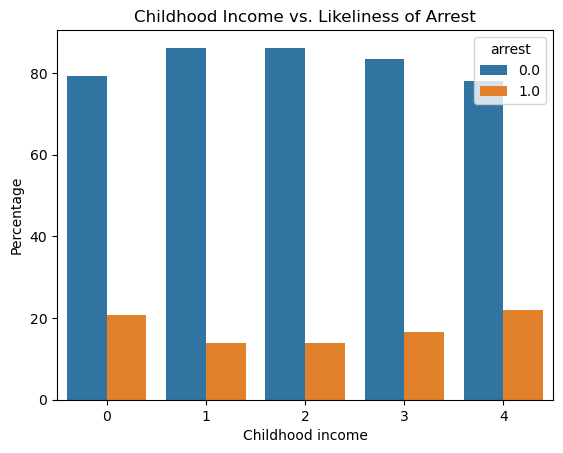

In [ ]:
# plot incom16 and arrest

# create a function to determine percentage, code helped with chatgpt
def calculate_percentages(group):
    total_count = group.sum()
    return 100 * group / total_count

# create the data for the y-axis 
grouped_data = df.groupby([var1, var2]).size().unstack()
percentage_data = grouped_data.apply(calculate_percentages, axis=1).stack().reset_index(name="Percentage") # last chunk of code help from chatgpt

# create the plot
sns.barplot(data=percentage_data, x=var1, y="Percentage", hue=var2).set(title = 'Childhood Income vs. Likeliness of Arrest', ylabel='Percentage', xlabel = 'Childhood income')

In [ ]:
# Incom16 grouped by arrest
#df.groupby(['incom16','arrest']).size().unstack().plot(kind='bar',stacked=True)

[Text(0.5, 1.0, 'Childhood Income vs. Highest Attained Education Level'),
 Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Childhood income')]

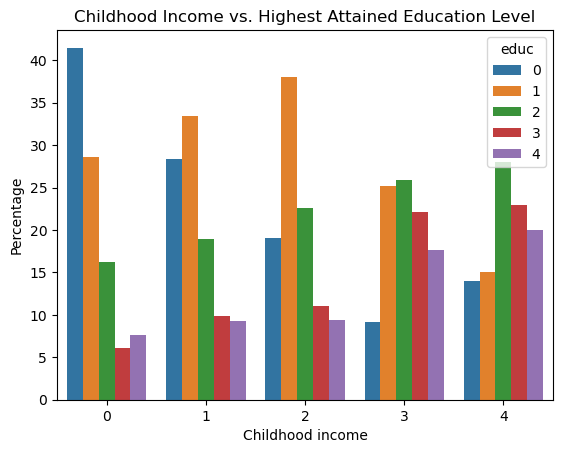

In [ ]:
# plot incom16 grouped by education

# create the data for the y-axis 
grouped_data = df.groupby([var1, var3]).size().unstack()
percentage_data = grouped_data.apply(calculate_percentages, axis=1).stack().reset_index(name="Percentage")

# create the plot
sns.barplot(data=percentage_data, x=var1, y="Percentage", hue=var3).set(title='Childhood Income vs. Highest Attained Education Level', ylabel ='Percentage', xlabel = 'Childhood income')



#ptable = df.groupby(['incom16','educ']).size().unstack()
#ax = ptable.plot(kind='bar',stacked=True)
#sns.countplot(data=df, x=var1, hue = var3)


C:\Users\cynth\AppData\Local\Temp\ipykernel_20612\3778046575.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['educ'] = pd.to_numeric(filtered_data['educ'], errors='coerce')


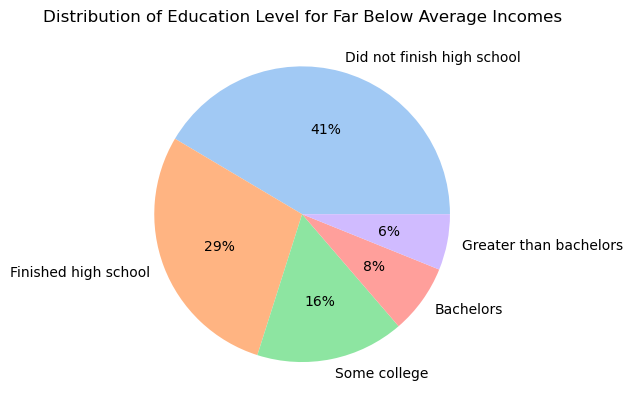

In [ ]:
# create pie chart of far below average income and highest attained level of education, code help from statology 

filtered_data = df[df['incom16'] == 0]

# define the labels and colors
labels = ['Did not finish high school', 'Finished high school', 'Some college', 'Bachelors', 'Greater than bachelors']
colors = sns.color_palette('pastel')[0:5]

# clean the education column
filtered_data['educ'] = pd.to_numeric(filtered_data['educ'], errors='coerce')

# create data for pie chart
category_counts = filtered_data['educ'].value_counts()

# create the pie chart
plt.pie(category_counts, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Distribution of Education Level for Far Below Average Incomes")
plt.show()

C:\Users\cynth\AppData\Local\Temp\ipykernel_20612\3087231939.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['educ'] = pd.to_numeric(filtered_data['educ'], errors='coerce')


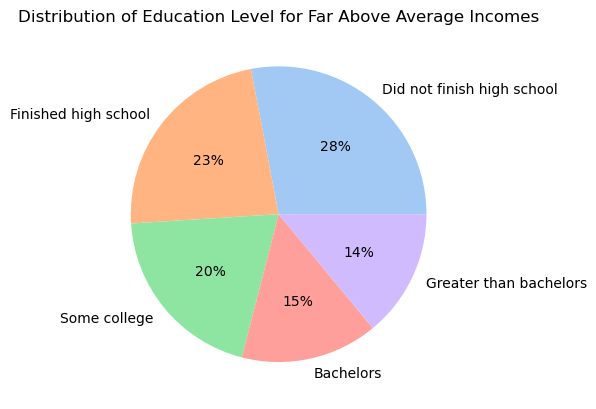

In [ ]:
filtered_data = df[df['incom16'] == 4]

# define the labels and colors
labels = ['Did not finish high school', 'Finished high school', 'Some college', 'Bachelors', 'Greater than bachelors']
colors = sns.color_palette('pastel')[0:5]

# clean the education column
filtered_data['educ'] = pd.to_numeric(filtered_data['educ'], errors='coerce')

# create data for pie chart
category_counts = filtered_data['educ'].value_counts()

# create the pie chart
plt.pie(category_counts, labels=labels, colors=colors, autopct='%.0f%%')
plt.title("Distribution of Education Level for Far Above Average Incomes")
plt.show()

[Text(0.5, 1.0, 'Childhood Income vs. Likelihood of Divorce'),
 Text(0, 0.5, 'Percentage'),
 Text(0.5, 0, 'Childhood income')]

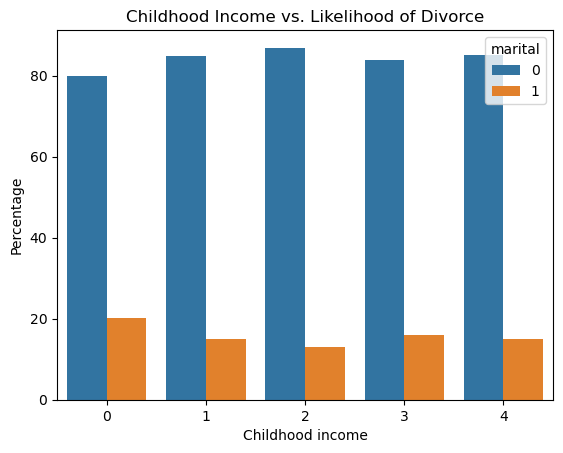

In [ ]:
# plot incom16 grouped by divorce
#group_by = 'incom16'
#var = 'marital'
#df_wide = df.pivot(columns=group_by,values=var)
#df_wide.plot.density()
#df_wide.loc[:,['0','1','2','3','4']].plot.density()
#df.groupby(['incom16','marital']).size().unstack().plot(kind='bar',stacked=True)

# create the data for the y-axis
grouped_data = df.groupby([var1, var5]).size().unstack()
percentage_data = grouped_data.apply(calculate_percentages, axis=1).stack().reset_index(name="Percentage")

# create the plot
sns.barplot(data=percentage_data, x=var1, y="Percentage", hue=var5).set(title='Childhood Income vs. Likelihood of Divorce', ylabel = 'Percentage', xlabel = 'Childhood income')

#get divorce percentages GIVEN person is married

**Results:**

Using the incom16 variable as the independent variable, we analyzed how the different metrics of arrests, divorce rate, and education level, all of which generally can be used to determine success in an adult life, are influenced by household income when growing up. Our initial analysis focuses on how whether people have been arrested or not varies with household income growing up. We can see a trend below in the graph, where people who were very poor or very rich growing up have a higher likelihood of being arrested than those who grew up in the middle class. Our original hypothesis was to see a general downward trend in likelihood of arrest childhood income levels increased, however the data suggest that middle class income levels produce lower rates of arrest than the higher income levels. View Graph 1 for reference.

The next aspect of adult life analyzed against household income level growing up was education level. It is clear in the graph below that there is a strong positive correlation between household income level growing up and the maximum level of education achieved in one’s adult life. This trend, that education level increases with household income growing up, remains true for those with at least some college experience, a bachelor’s degree, and higher education than that. When looking specifically at those who did not complete high school, the lowest income level has a significantly higher percentage than any other level. When looking at groups of people who have only completed high school or have no degree at all, we can see that as household income increases, although there is less strict of a trend, the amount of people in these groups diminishes overall.  View graph 2 for reference. A more clear visualization can be seen in the pie charts below, showing the distribution of education levels at the lowest level and highest level of income. View graph 3 and 4 for reference.
    
Finally, we examined how divorce data varies as household income when growing up varies. We can see that there is actually not a very strong correlation between household income when growing up and divorce rates. There is a slight increase in divorce rates at the lowest income level, but despite this outlier, there is no significant trend observable in the data to form an adequate conclusion on the correlation between household income when growing up and the likelihood of getting a divorce. View graph 5 for reference.


**Conclusion:** 

This project explored the relationship between childhood household income and key factors of “success” in adult life, like education, arrests, and marital status. This was determined using the dataset of the General Social Survey (GSS), an annual survey conducted since 1972 to collect information on tens of thousands of Americans. The primary variable of interest was “incom16”, which gauged respondents’ perceptions of their family income at the age of 16. 
The size of the dataset was a challenge, initially containing around 72,000 observations before cleaning. In order to make the dataset more manageable, only the relevant variables were kept; however, the size of the dataset made it incompatible with the first Jupyter Notebook service we used, Google Colab. This was solved by switching to Rivanna. Additional challenges were faced with handling the “arrest” variable, as it required a pre-existing condition, potentially excluding participants who had been arrested but did not meet that condition. The project acknowledged this limitation by working with available data to form meaningful relationships. 

After cleaning and preparing the data, results showed some unexpected trends. When comparing arrest history and childhood income, it was observed that respondents who grew up either very poor or very rich had higher likelihoods of arrests than those from more middle-class backgrounds. Divorce rates did not seem to have an overall trend regarding the relationship between childhood income. For education levels, there was a strong positive correlation with childhood income, where higher income was generally associated with higher levels of education. 
